Memories took me back to one of the data science projects I did when I was a novice in the data world- Iris classification on the popular iris dataset collected by the one of the founding father of statistics, Sir Ronald Fisher.
There was no much of a preprocessing to be done, so I did lots of exploration and visualization to compensate.
the code is self explanatory, you can go through it here.

With an accuracy of 100%, I modelled the data on logistic regression

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn import metrics 
from sklearn.model_selection import train_test_split


from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression

In [51]:
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
iris= load_iris()

In [3]:
X = iris.data
y = iris.target

In [44]:
# convert scikit learn dataset to pandas dataframe
#data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                     columns= iris['feature_names'] + ['target'])

X= pd.DataFrame(iris['data'], columns= iris['feature_names'])
y = pd.DataFrame(iris['target'],columns=['target'])
df = X.join(y)


In [45]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [9]:
type(iris)

sklearn.utils.Bunch

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [66]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [65]:
df.duplicated().sum()

1

In [ ]:
df.isnull().sum()

In [67]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

In [70]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [20]:
df.shape

(150, 5)

In [14]:
# change the datatype of the target to category
df['target'] = df.astype('category')

In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df.describe(include = object)

,target
count,150.0
unique,35.0
top,5.0
freq,10.0


In [21]:
## Visualization

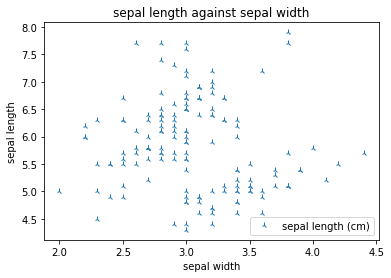

In [23]:
df.plot(x = 'sepal width (cm)', y = 'sepal length (cm)', style = '2')
plt.title('sepal length against sepal width')
plt.xlabel('sepal width')
plt.ylabel('sepal length')
plt.show()

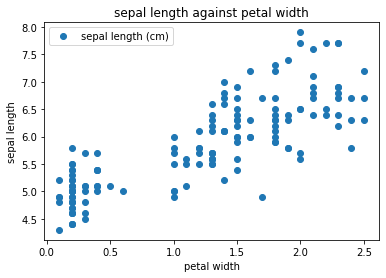

In [24]:
df.plot(x = 'petal width (cm)', y = 'sepal length (cm)', style = 'o')
plt.title('sepal length against petal width')
plt.xlabel('petal width')
plt.ylabel('sepal length')
plt.show()

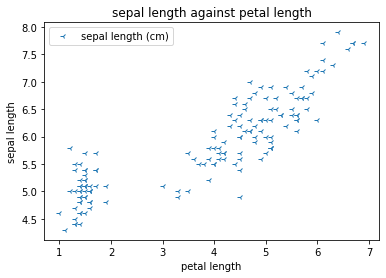

In [25]:
df.plot(x = 'petal length (cm)', y = 'sepal length (cm)', style = '3')
plt.title('sepal length against petal length')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.show()

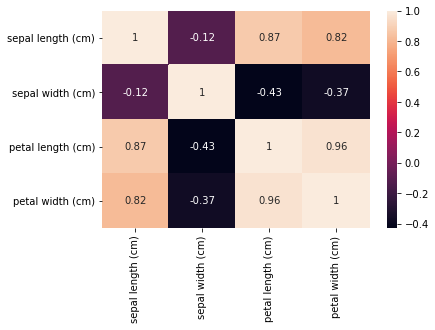

In [31]:
correlation = df.corr()
sns.heatmap(correlation, annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE5D1C38E0>,
      dtype=object)

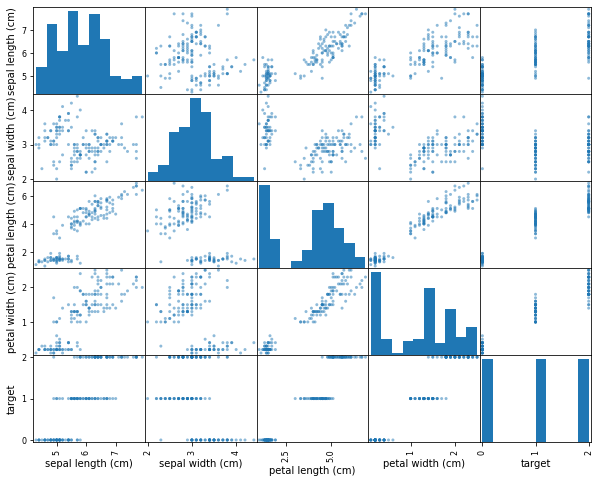

In [59]:

attributes = iris['feature_names']
#["sepal_length", "sepal_width", "petal_length", "petal_width"]
scatter_matrix(df, figsize = (10,8))

In [58]:
df[iris['feature_names']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20
...,...,...,...,...
145,6.70,3.00,5.20,2.30
146,6.30,2.50,5.00,1.90
147,6.50,3.00,5.20,2.00
148,6.20,3.40,5.40,2.30


In [62]:
summary = pd.pivot_table(data, index = ['target'], aggfunc = 'mean')
summary

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
target,,,,
0.00,1.46,0.25,5.01,3.43
1.00,4.26,1.33,5.94,2.77
2.00,5.55,2.03,6.59,2.97


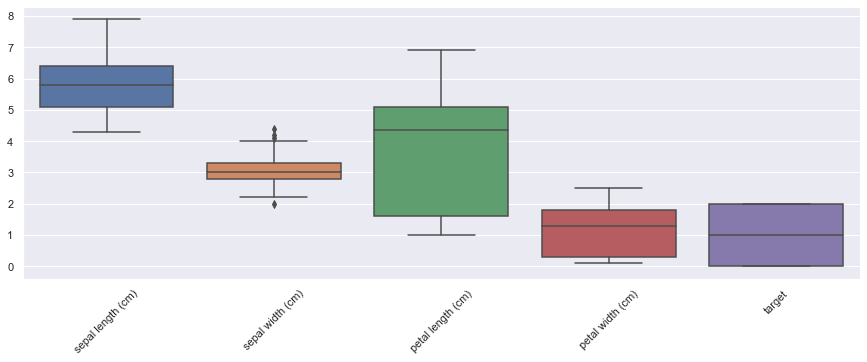

In [108]:
## box plot
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [46]:
#data splicing into train, test and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [47]:
y_test

,target
114,2
62,1
33,0
107,2
7,0
100,2
40,0
86,1
76,1
71,1


In [48]:
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
models, predictions = clf.fit(X_train,X_test,y_train,y_test)
print(models)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.55it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     1.00               1.00    None      1.00   
LogisticRegression                 1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
SVC                                1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
SGDClassifier                      1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00    None      1.00   
KNeighborsClassifier               1.00               1.00    None      1.00   
Perceptron                         1.00 

In [105]:
model1 = LogisticRegression()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [106]:
# Use score method to get accuracy of model1
score = model1.score(X_test, y_test)
print(score)

1.0


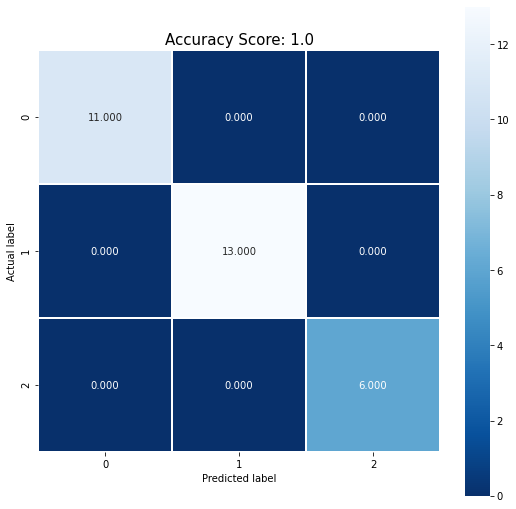

In [104]:
## confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [97]:
len(y_test)

30

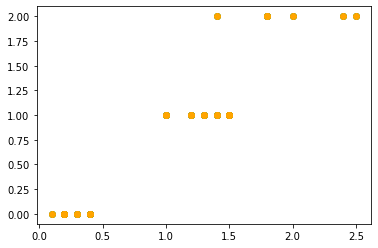

In [103]:
# plot predicted vs dependent

plt.scatter(X_test['petal width (cm)'], y_test, color= 'green')
plt.scatter(X_test['petal width (cm)'], y_pred, color= 'orange')
plt.show()

**
- [x] obtain the code for the best performing model
- [x] plot the y_pred V y_actual
- [x] confusion matrix
- [ ] visualization
